In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [11]:
cancer = load_breast_cancer()

#ノイズ特徴量をデータに加える
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [12]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
                 n_features_to_select=40)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

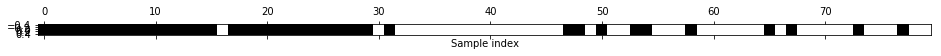

In [16]:
# 選択された特徴量を可視化
mask = rfe.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [18]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train_rfe, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print('Accuracy on training set: {:.3f}'.format(logreg.score(X_train_rfe, y_train)))
print('Accuracy on test set: {:.3f}'.format(logreg.score(X_test_rfe, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.951


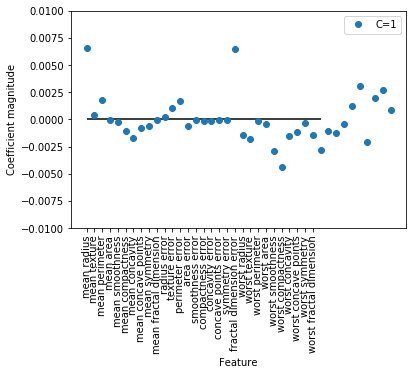

In [22]:
z_value = logreg.coef_ / np.std(X_train_rfe)

plt.plot(z_value.T, 'o', label='C=1')
#plt.plot(z_value100.T, '^', label='C=100')
#plt.plot(z_value001.T, 'v', label='C=001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
#plt.ylim(-5, 5)
plt.ylim(-0.01, 0.01)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()

In [25]:
def plot_feature_importances(model, z):
    n_features = X_train_rfe.shape[1]
    plt.barh(range(n_features), z.T, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature importane')
    plt.ylabel('Feature')

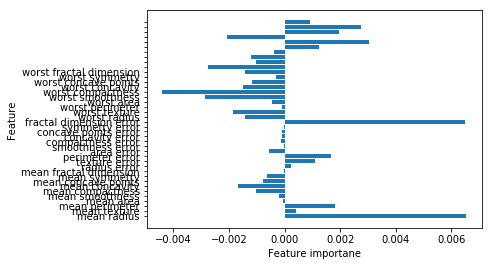

In [26]:
plot_feature_importances(logreg, z_value)